In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Cargar los datos
df = pd.read_csv("train.csv")

# Seleccionamos solo variables numéricas
df_num = df.select_dtypes(include=[np.number])

# Eliminamos las filas con valores nulos 
df_num = df_num.dropna()

# Separar variables predictoras (X) y variable objetivo (y)
X = df_num.drop(columns=["SalePrice", "Id"])
y = df_num["SalePrice"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # salida de regresión

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

y_pred_nn = model.predict(X_test).flatten()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [29]:
# Regresión lineal
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Red neuronal
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Regresión Lineal -> MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Red Neuronal     -> MSE: {mse_nn:.2f}, R²: {r2_nn:.2f}")


Regresión Lineal -> MSE: 1588229760.73, R²: 0.80
Red Neuronal     -> MSE: 6000551936.00, R²: 0.24


In [30]:
nuevos_datos = X_test[:5]
pred_lr = lr.predict(nuevos_datos)
pred_nn = model.predict(nuevos_datos).flatten()

print("Predicciones con regresión lineal:", pred_lr)
print("Predicciones con red neuronal:    ", pred_nn)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicciones con regresión lineal: [149575.3367402  158230.46370932 108496.29825731 141537.83886374
 157079.77923371]
Predicciones con red neuronal:     [51519.113 41514.06  76571.08  50649.848 17189.281]


In [31]:
resultados = pd.DataFrame({
    "Real": y_test[:5].values,
    "Regresión Lineal": pred_lr,
    "Red Neuronal": pred_nn
})
print(resultados)


     Real  Regresión Lineal  Red Neuronal
0  140000     149575.336740  51519.113281
1  150750     158230.463709  41514.058594
2  157000     108496.298257  76571.078125
3  138000     141537.838864  50649.847656
4  144000     157079.779234  17189.281250


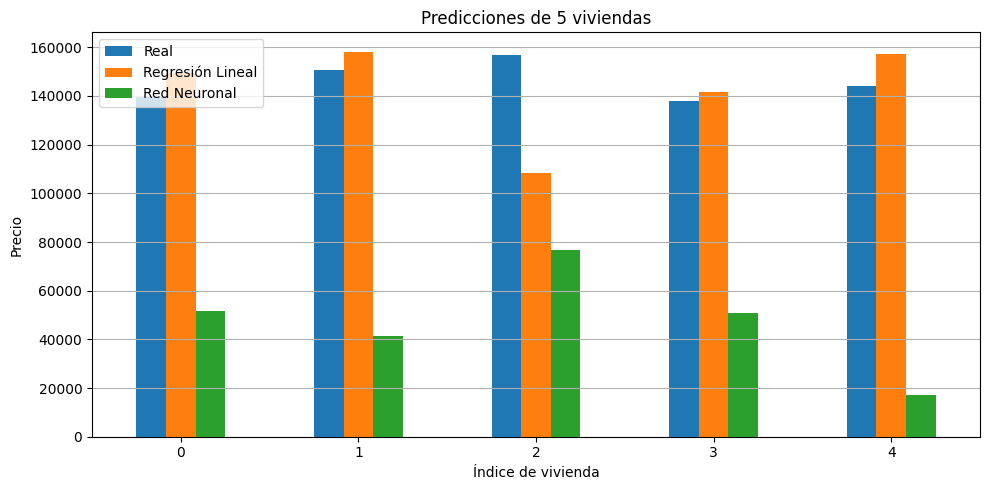

In [32]:
resultados.plot(kind='bar', figsize=(10, 5))
plt.title("Predicciones de 5 viviendas")
plt.xlabel("Índice de vivienda")
plt.ylabel("Precio")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()